<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Advanced Machine Learning - Project Debrief</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 imblearn tabulate -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

## Import Dataset

In [3]:
df = pd.read_csv('EasyVisa.csv')
data = df.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [6]:
df.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns

#### Check the data types of the columns for the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* The data types apperas to be inline with the context provided by the name of the column

### Checking for missing values

In [8]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing values

### Checking for duplicate values

In [9]:
df.duplicated().sum()

0

* There are no duplicates

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [10]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


* There are negative values in the column `no_of_employess` this is not right and needs to be treated
* The minimum value for `prevailing_wage` is `$2` which appears to be wrong, we need to investigate more on this outlier. 

#### Fixing the negative values in number of employees columns

In [11]:
df[df['no_of_employees'] < 0].shape

(33, 12)

* There are a total of 33 rows with negative value for `no_of_employees`

In [12]:
# Fix the negative value by using the absolute function
df["no_of_employees"] = df["no_of_employees"].abs()
# Verify whether all the negatives are handled
df[df['no_of_employees'] < 0].shape

(0, 12)

* All the negative values in `no_of_employees` column is handled.

#### Let's check the count of each unique category in each of the categorical variables

In [13]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Drop case_id as it is the unique id for each case
cat_col.remove('case_id')

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

#### Drop the `case_id` column

In [14]:
df.drop(["case_id"], axis=1, inplace=True)

### Univariate Analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

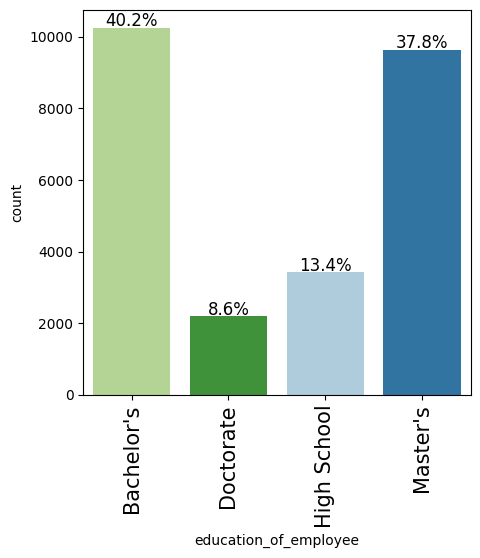

In [17]:
labeled_barplot(df, "education_of_employee", perc=True)

* Most of the employees has `Bachelor's` or `Master's` degree making a total of `78%`
* `High School` make the 3rd largest at `13.4%`
* Very less number of employees has `Dcotorate` degree at `8.6%`

#### Observations on region of employment

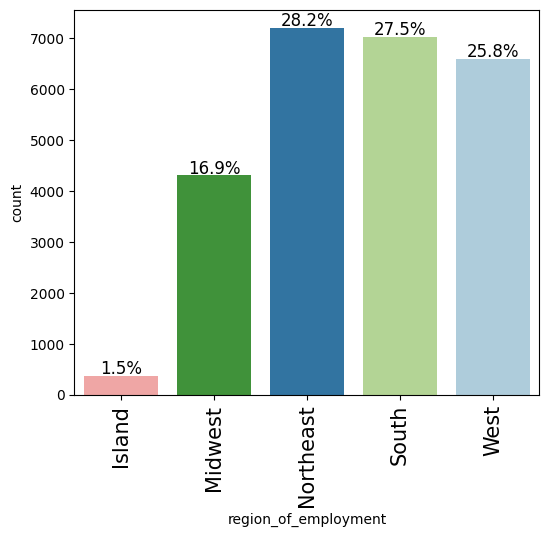

In [18]:
labeled_barplot(df, "region_of_employment", perc=True) 

* The applictions appears to be almost equally distributed among Norteast, South and West
* Island appears to have less number of applications

#### Observations on job experience

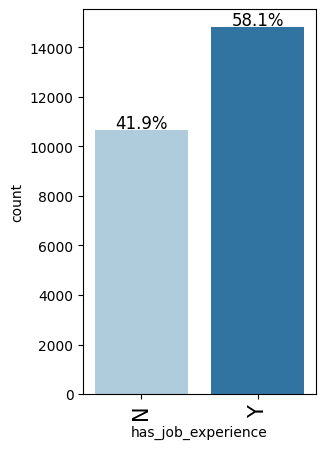

In [19]:
labeled_barplot(df, "has_job_experience", perc=True) 

* More applicants have job experience at `58.1%`

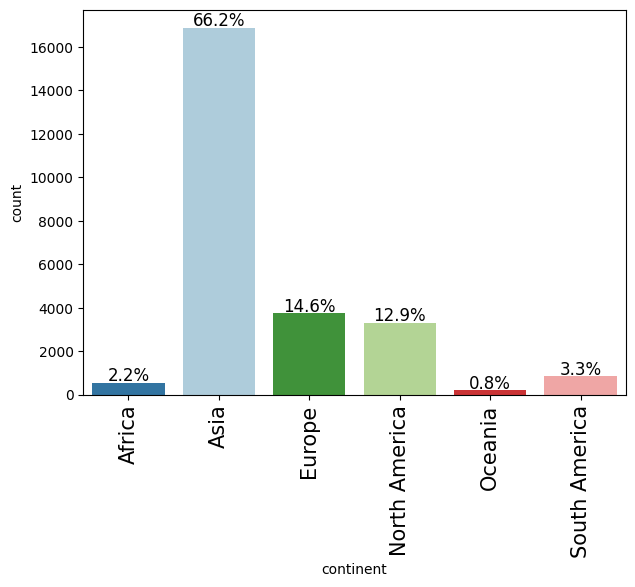

In [20]:
labeled_barplot(df, "continent", perc=True) 

* Most of the applications are from Asia at `66.2%`
* Followed by Europe at `14.6%`

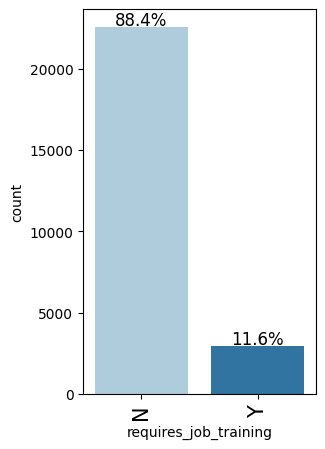

In [21]:
labeled_barplot(df, "requires_job_training", perc=True) 

* Majority of the applicants doesn't require a job traning.

#### Observations on case status

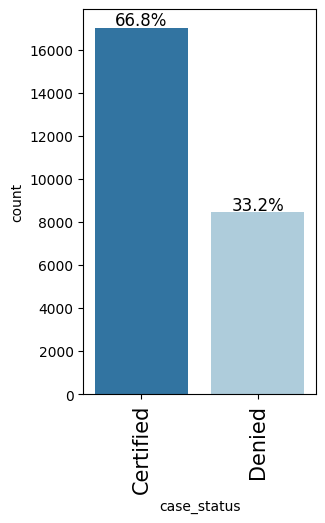

In [22]:
labeled_barplot(df, "case_status", perc=True) 

* Certified rate is high when compared to Denied rate, however `32%` is still a high number, we need to check the influencing factors in bivariat analysis.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow",hue=target)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
        hue=target
    )

    plt.tight_layout()
    plt.show()

In [24]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


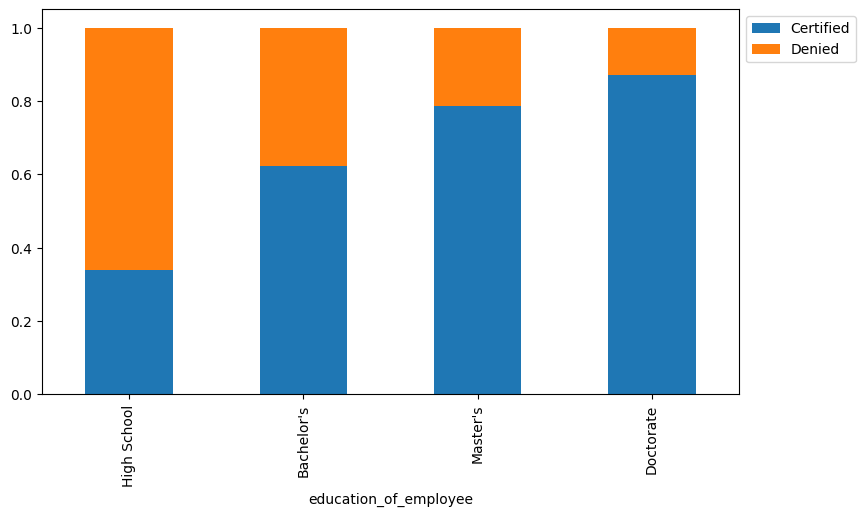

In [25]:
stacked_barplot(data, "education_of_employee", "case_status")

* Education has an positive impact on visa certification.
* Higher the education better the chance of getting the application certified.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


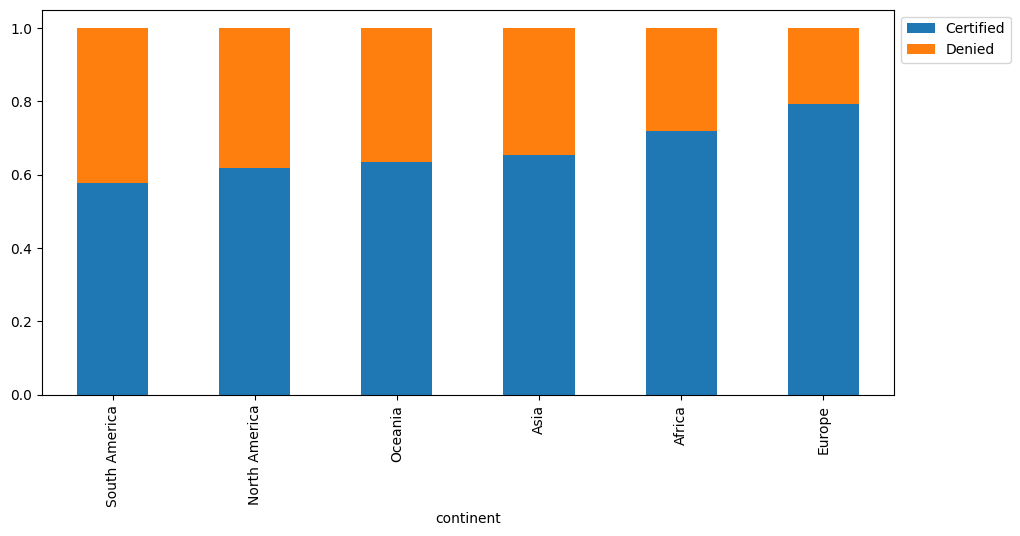

In [26]:
stacked_barplot(data, "continent", "case_status") 

* Applicants from Europe tends to have higher approval rate.
* With South America having less approvals.
* However the difference seems to be around 10%, which is not significant comparing to education.
* We can conclude that while continent has some effect, its not a strong influencer.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


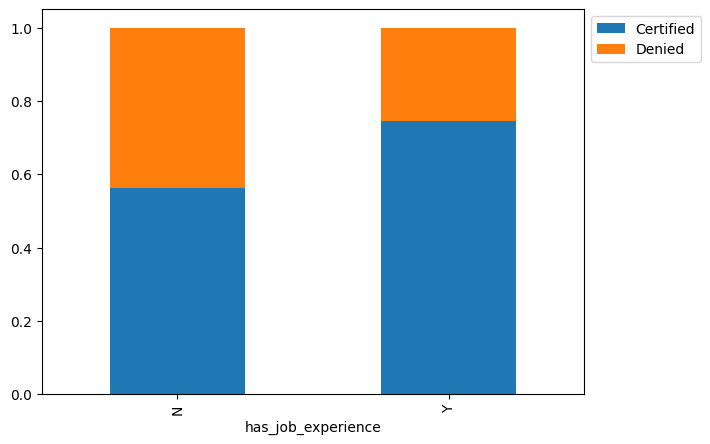

In [27]:
stacked_barplot(df, "has_job_experience", "case_status")

* Chances of application getting certified is more for applicants with work experience.

#### Checking if the prevailing wage is similar across all the regions of the US

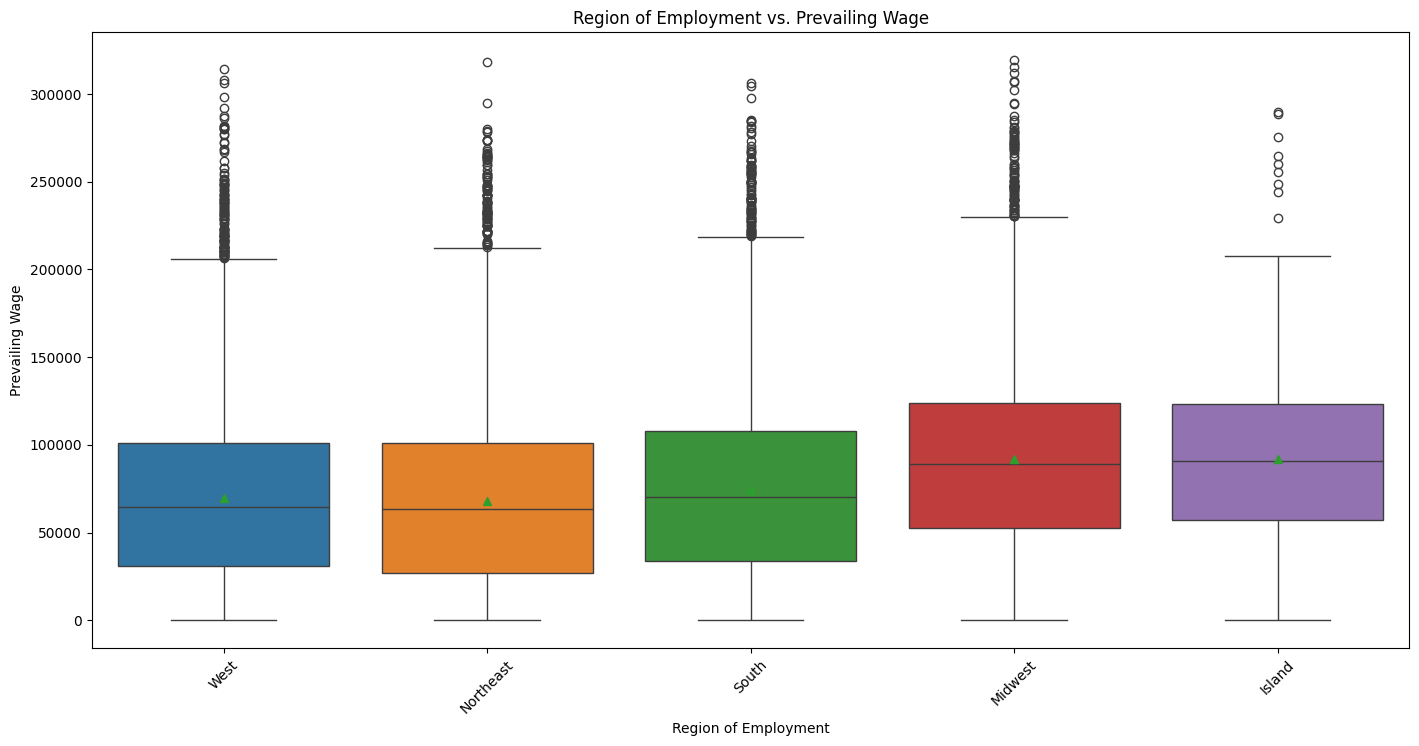

In [28]:
plt.figure(figsize=(17,8))

sns.boxplot(x = "region_of_employment", y = "prevailing_wage", data = df, showmeans=True,  hue = "region_of_employment")

plt.title('Region of Employment vs. Prevailing Wage')
plt.xlabel('Region of Employment')
plt.ylabel('Prevailing Wage')
plt.xticks(rotation = 45)
plt.show()

* Prevailing Wage seems to be higher for Island and Midwest region.
* Other regions with higher number of applications seems to have similar wage.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

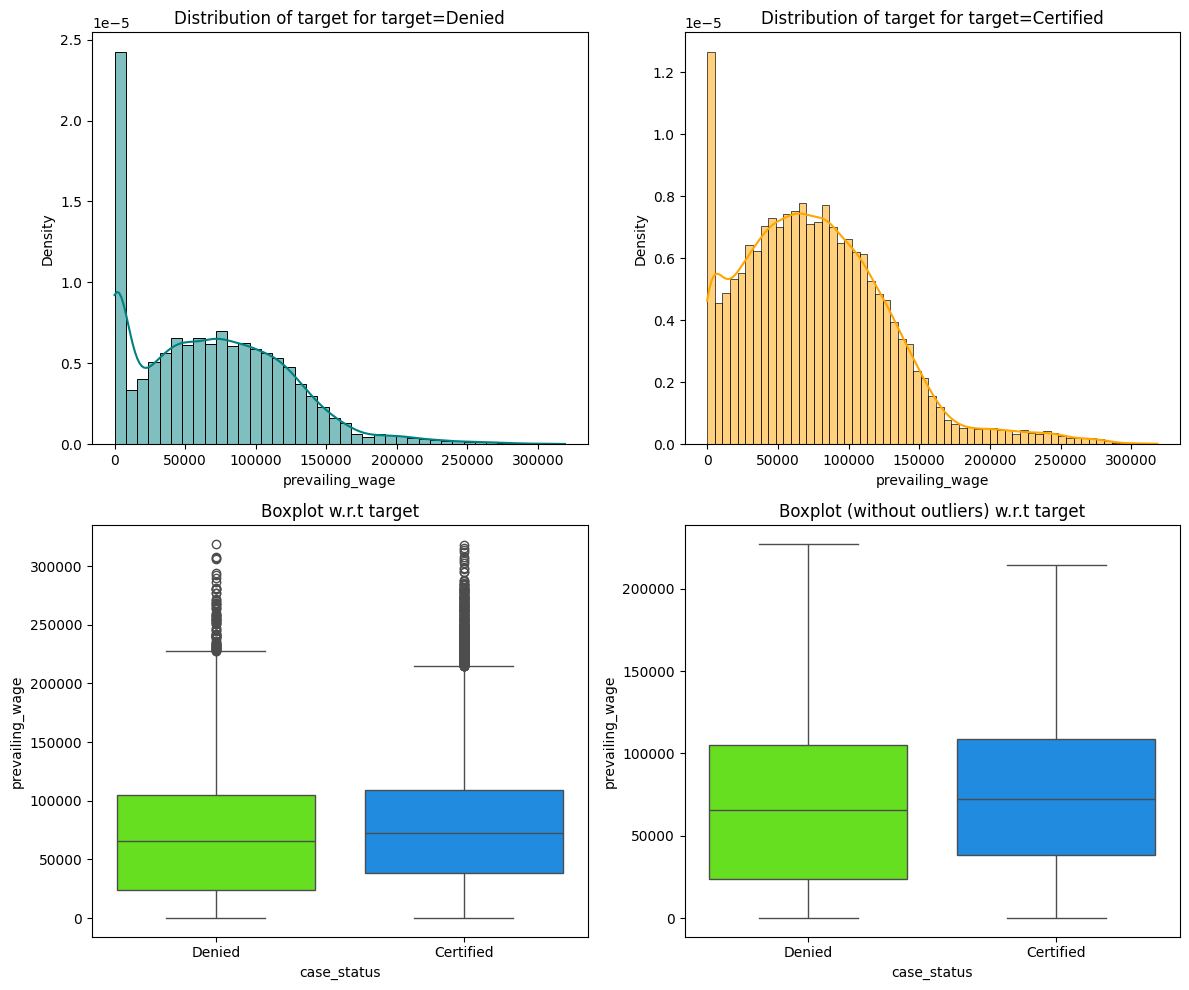

In [29]:
distribution_plot_wrt_target(df,'prevailing_wage','case_status') 

* Lower Prevailing Wages Correlate with Higher Denial Rates: The skewed "Denied" distribution clearly shows that lower prevailing wages are associated with a higher probability of visa denial.
* Higher Prevailing Wages Increase Certification Likelihood: While certifications occur across a range of wages, the "Certified" distribution's shape implies that higher wages generally increase the likelihood of visa approval.
* Prevailing Wage Is Not the Only Factor: The overlap between the two distributions indicates that other factors beyond prevailing wage play a significant role in visa status determination. These could include the applicant's qualifications, the employer's petition, labor market conditions, and more.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


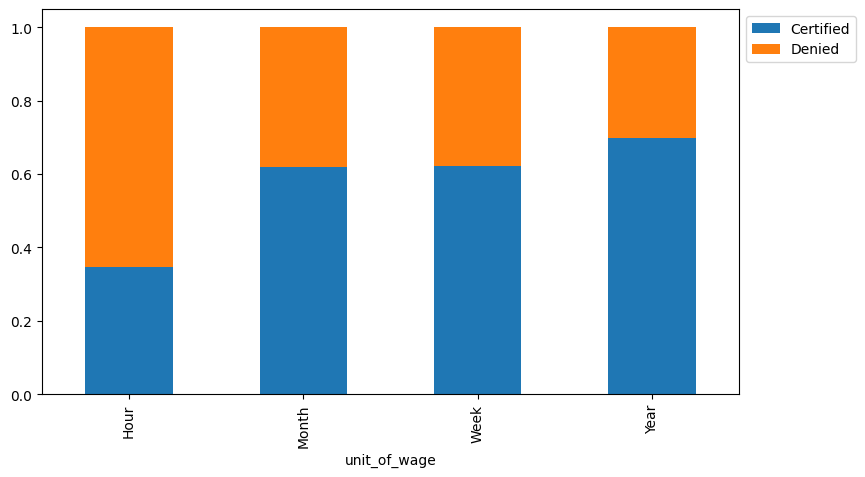

In [30]:
stacked_barplot(df,'unit_of_wage','case_status')

* Hourly wage seems to have higher denial rate
* While unit seems to have an influence. However, to confirm this effect, a deeper analysis normalizing wages across units is necessary.

## Data Pre-processing

### Outlier Check

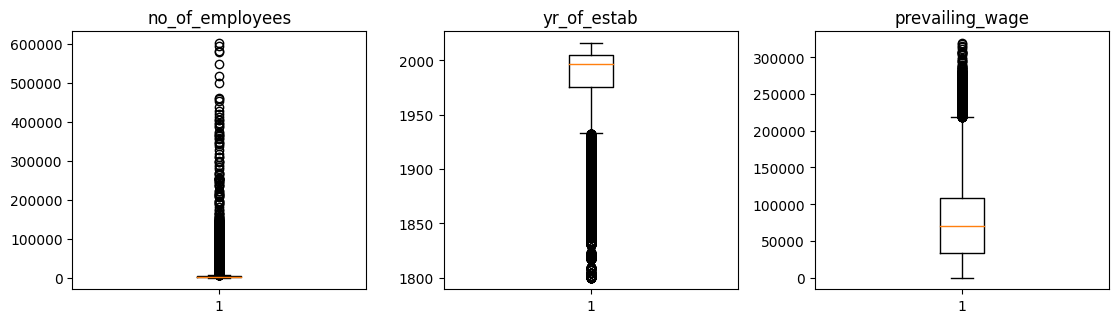

In [31]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### `no_of_employees`
* The majority of companies have relatively few employees.
* A significant number of extreme outliers are present, reaching up to 600,000+ employees.
#### `yr_of_estab`
* Most companies were established after 1950, clustering around 2000.
* A significant number of outliers exist before 1900, with extreme values near 1800.
#### `prevailing_wage`
* The median wage is relatively low.
* The outlier could be due to the varing units in the wage. Its better to normalize the wages to yearly wage.

### Data Preparation for modeling

Let's prepare the data for by cnverting categorical columns to numberic / One Hot Encoding, nomalizing the values like prevailing wage to efficient models.
*  Convert Binary Categorical Columns (case_status, has_job_experience, requires_job_training, full_time_position) to 0 & 1
*  One-Hot Encoding for Nominal Categorical Columns (continent,region_of_employment)
*  Label Encoding for Ordinal variables like education_of_employee
*  Normalize prevailing wage to standard unit like yearly

In [32]:
# Convert binary categorical to numeric
df['case_status'] = df['case_status'].map({'Certified': 1, 'Denied': 0})
df['has_job_experience'] = df['has_job_experience'].map({'Y': 1, 'N': 0})
df['requires_job_training'] = df['requires_job_training'].map({'Y': 1, 'N': 0})
df['full_time_position'] = df['full_time_position'].map({'Y': 1, 'N': 0})

In [33]:
# Convert unit_of_wage to yearly equivalent
def convert_to_yearly(row):
    if row['unit_of_wage'] == 'Hour':
        return row['prevailing_wage'] * 40 * 52
    elif row['unit_of_wage'] == 'Week':
        return row['prevailing_wage'] * 52
    elif row['unit_of_wage'] == 'Month':
        return row['prevailing_wage'] * 12
    else:
        return row['prevailing_wage']

df['normalized_wage'] = df.apply(convert_to_yearly, axis=1)
df.drop(['prevailing_wage','unit_of_wage'],axis=1, inplace=True)

In [34]:
#One-Hot encdding
categorical_cols = ['continent', 'region_of_employment']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) 

In [35]:
# Encode education_of_employee
education_map = {
    "High School": 0,    
    "Bachelor's": 1,
    "Master's": 2,
    "Doctorate": 3
}
df['education_of_employee'] = df['education_of_employee'].map(education_map)

In [36]:
df.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,full_time_position,case_status,normalized_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,0,0,0,14513,2007,1,0,1231782.032,1,0,0,0,0,0,0,0,1
1,2,1,0,2412,2002,1,1,83425.650,1,0,0,0,0,0,1,0,0
2,1,0,1,44444,2008,1,0,122996.860,1,0,0,0,0,0,0,0,1
3,1,0,0,98,1897,1,0,83434.030,1,0,0,0,0,0,0,0,1
4,2,1,0,1082,2005,1,1,149907.390,0,0,0,0,0,0,0,1,0


* We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [37]:
X = df.drop(['case_status'], axis=1)
y = df["case_status"]

# Split the train and validation data set in 70:30 ratio
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

# Split the validation to test and validation data set in 90:10 ratio
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=0.10,random_state=1,stratify=y_val
)

print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Shape of Training set :  (17836, 16)
Shape of Validation set :  (6879, 16)
Shape of test set :  (765, 16)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in validation set:
1    0.66783
0    0.33217
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667974
0    0.332026
Name: case_status, dtype: float64


## Model Building

### Model Evaluation Criterion

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model,name,dataset, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    return pd.DataFrame(
        {"Model Name":name,"Dataset":dataset,"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

In [39]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

* Let's focus on `F1-score` because it is a balanced metric that considers both precision and recall, making it ideal when both false approvals and false denials matter.
* If we focus only on recall, we might approve too many unqualified applicants (high false positives).
* If we focus only on precision, we might reject too many deserving applicants (high false negatives).
* F1-score balances both, ensuring neither issue dominates.

In [40]:
scorer = metrics.make_scorer(metrics.f1_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [41]:

# Create instances for the models and evaluate each model so we can pick a bet fit.

def get_models():
    models = [] 

    models.append(("Bagging", BaggingClassifier(random_state=1)))
    models.append(("Bagging_LR", BaggingClassifier(estimator=LogisticRegression(solver='liblinear', random_state=1),random_state=1)))
    models.append(("Random forest",RandomForestClassifier(random_state=1)))
    models.append(("GBM", GradientBoostingClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(algorithm="SAMME",random_state=1)))
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
    models.append(("dtree", DecisionTreeClassifier(random_state=1))) 

    return models

def get_model_by_name(name, models):
    for i, (model_name, model) in enumerate(models):
        if model_name == name:
            return model, i
    return None, None


def update_model(name, updated_model, models):
    model, index = get_model_by_name(name, models)
    if model:
        models[index] = (name, updated_model)
    else:
        print("Model not found.")

def add_model(name, new_model,models):
    model, index = get_model_by_name(name,models)
    if not model:
        models.append((name, new_model))
    else:
        print("Model with this name already exists.")


In [42]:
# Initialize the dataframe to get scores from various model
df_scores = pd.DataFrame()

In [43]:
models = get_models()
# Perform cross-validation to evaluate the performance of different machine learning models on the traning dataset

cv_results_train = []
model_names = []
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    cv_results_train.append(cv_result)
    model_names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

# Store cross-validation results in a DataFrame
cv_df = pd.DataFrame(cv_results_train, index=model_names)
cv_df['Mean_CV_Score'] = cv_df.mean(axis=1)



Cross-Validation performance on training dataset:

Bagging: 0.772784765789873
Bagging_LR: 0.7989728631896076
Random forest: 0.8015310489616765
GBM: 0.8192352496506281
Adaboost: 0.8169267608533295
Xgboost: 0.8050722966863754
dtree: 0.7371477199246396


In [44]:
print("\n" "Validation Performance:" "\n")
validation_results = []
for name, model in models:
    model.fit(X_train,y_train)
    update_model(name,model,models)
    scores = f1_score(y_val, model.predict(X_val))
    validation_results.append(scores)
    df_scores = pd.concat([df_scores,model_performance_classification_sklearn(model,name,'Validation', X_val, y_val)], ignore_index=True)

    print("{}: {}".format(name, scores))

# Add validation results to the DataFrame
cv_df['Validation_Recall'] = validation_results
df_scores


Validation Performance:

Bagging: 0.7701298701298701
Bagging_LR: 0.7988087939038276
Random forest: 0.7963772642098689
GBM: 0.8158697863682605
Adaboost: 0.8114548913587664
Xgboost: 0.803921568627451
dtree: 0.7360472751149048


,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047


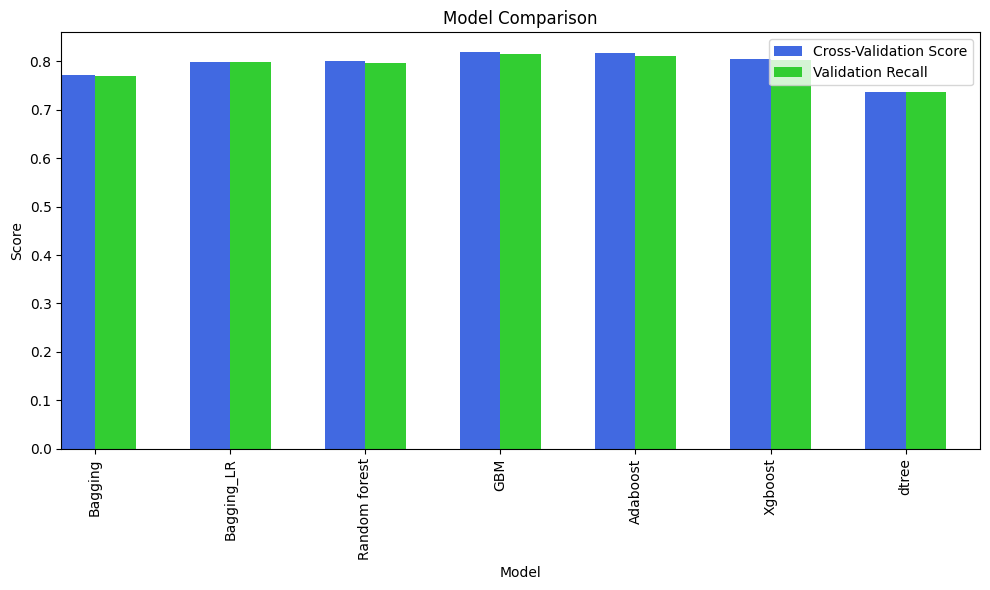

In [45]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for cross-validation results
cv_df['Mean_CV_Score'].plot(kind='bar', ax=ax, color='royalblue', position=1, width=0.3, label='Cross-Validation Score')

# Bar plot for validation recall
cv_df['Validation_Recall'].plot(kind='bar', ax=ax, color='limegreen', position=0, width=0.3, label='Validation Recall')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.legend()
plt.tight_layout()
plt.show()

* The score are close between the train and validation sets.
* Positive sign signaling that the models are generalizing well.
* Comparing various model, Gradient Boost seems to be performing slightly better than other models.

### Model Building with oversampled data

In [46]:
# Let's use the SMOTE and over sample the data
# In our original data we had 66% certified and 33% denied, we will use that as a reference to choose strategy and k-neighbours
sm = SMOTE(sampling_strategy=0.67, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Create a dictionary to store the results
data = {
    "Label": ["1", "0"],
    "Before OverSampling": [sum(y_train == 1), sum(y_train == 0)],
    "After OverSampling": [sum(y_train_over == 1), sum(y_train_over == 0)]
}

df_results = pd.DataFrame(data)

# Print the DataFrame
print(df_results.to_markdown(index=False, numalign="left", stralign="left"))

# Print the shape information separately
print("\nAfter OverSampling, the shape of train_X:", X_train_over.shape)
print("After OverSampling, the shape of train_y:", y_train_over.shape)




| Label   | Before OverSampling   | After OverSampling   |
|:--------|:----------------------|:---------------------|
| 1       | 11913                 | 11913                |
| 0       | 5923                  | 7981                 |

After OverSampling, the shape of train_X: (19894, 16)
After OverSampling, the shape of train_y: (19894,)


In [47]:
models_oversampled = get_models()
# Perform cross-validation to evaluate the performance of different machine learning models on the traning dataset

cv_results_train_os = []
model_names_os = []
print("\n" "Cross-Validation performance on training oversampled dataset:" "\n")

for name, model in models_oversampled:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring = scorer,cv=kfold
    )
    cv_results_train_os.append(cv_result)
    model_names_os.append(name)
    print("{}: {}".format(name, cv_result.mean()))

# Store cross-validation results in a DataFrame
cv_df_over = pd.DataFrame(cv_results_train_os, index=model_names_os)
cv_df_over['Mean_CV_Score'] = cv_df_over.mean(axis=1) 



Cross-Validation performance on training oversampled dataset:

Bagging: 0.7649121941702595
Bagging_LR: 0.7977344572070983
Random forest: 0.7953629910326498
GBM: 0.8078977862947163
Adaboost: 0.8009204656216709
Xgboost: 0.8003680648621192
dtree: 0.7348857569884925


In [48]:
print("\n" "Validation Performance on Oversampled data:" "\n")
validation_results_over = []
for name, model in models_oversampled:
    model.fit(X_train_over,y_train_over)
    add_model(f'Over Sampled {name}',model, models)
    scores = f1_score(y_val, model.predict(X_val))
    df_scores = pd.concat([df_scores,model_performance_classification_sklearn(model,f'Over Sampled {name}','Validation', X_val, y_val)], ignore_index=True)
    validation_results_over.append(scores)
    print("{}: {}".format(name, scores))

# Add validation results to the DataFrame
cv_df_over['Validation_Recall'] = validation_results_over
df_scores


Validation Performance on Oversampled data:

Bagging: 0.7636922401492701
Bagging_LR: 0.8108108108108109
Random forest: 0.7917107210826814
GBM: 0.8030271179314694
Adaboost: 0.797373358348968
Xgboost: 0.7953069348418186
dtree: 0.7337906616508078


,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047
7,Over Sampled Bagging,Validation,0.687018,0.757292,0.770201,0.763692
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
9,Over Sampled Random forest,Validation,0.713621,0.814976,0.769737,0.791711


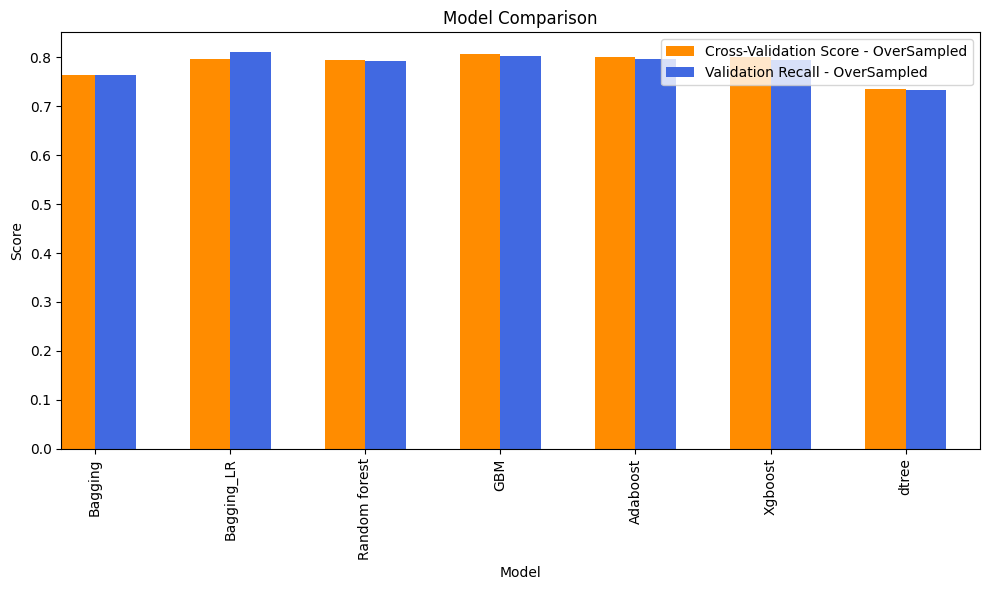

In [49]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))


# Bar plot for cross-validation results
cv_df_over['Mean_CV_Score'].plot(kind='bar', ax=ax, color='darkorange', position=1, width=0.3, label='Cross-Validation Score - OverSampled')

# Bar plot for validation recall
cv_df_over['Validation_Recall'].plot(kind='bar', ax=ax, color='royalblue', position=0, width=0.3, label='Validation Recall - OverSampled')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.legend()
plt.tight_layout()
plt.show()

* The score are close between the train and validation sets.
* Positive sign signaling that the models are generalizing well.
* Comparing various models, Logistic Regression seems to be performing better than other models.
* The models seems to be performing slightly low on oversampled data

### Model Building with undersampled data

In [50]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Create a dictionary to store the results
data = {
    "Label": ["1", "0"],
    "Before UnderSampling": [sum(y_train == 1), sum(y_train == 0)],
    "After UnderSampling": [sum(y_train_un == 1), sum(y_train_un == 0)]
}

df_results = pd.DataFrame(data)

# Print the DataFrame
print(df_results.to_markdown(index=False, numalign="left", stralign="left"))

# Print the shape information separately
print("\nAfter OverSampling, the shape of train_X:", X_train_un.shape)
print("After OverSampling, the shape of train_y:", y_train_un.shape)

| Label   | Before UnderSampling   | After UnderSampling   |
|:--------|:-----------------------|:----------------------|
| 1       | 11913                  | 5923                  |
| 0       | 5923                   | 5923                  |

After OverSampling, the shape of train_X: (11846, 16)
After OverSampling, the shape of train_y: (11846,)


In [51]:
models_undersampled = get_models()
# Perform cross-validation to evaluate the performance of different machine learning models on the traning dataset

cv_results_train_un = []
model_names_un = []
print("\n" "Cross-Validation performance on training undersampled dataset:" "\n")

for name, model in models_undersampled:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring = scorer,cv=kfold
    )
    cv_results_train_un.append(cv_result)
    model_names_un.append(name)
    print("{}: {}".format(name, cv_result.mean()))

# Store cross-validation results in a DataFrame
cv_df_un = pd.DataFrame(cv_results_train_un, index=model_names_un)
cv_df_un['Mean_CV_Score'] = cv_df_un.mean(axis=1) 



Cross-Validation performance on training undersampled dataset:

Bagging: 0.6434440343727996
Bagging_LR: 0.6742533731521089
Random forest: 0.681405649821858
GBM: 0.7064338007609178
Adaboost: 0.6946147028203076
Xgboost: 0.6873316312580277
dtree: 0.6218523948699761


In [52]:
print("\n" "Validation Performance on Undersampled data:" "\n")
validation_results_un = []
for name, model in models_undersampled:
    model.fit(X_train_un,y_train_un)
    add_model(f'Under Sampled {name}',model, models)
    scores = f1_score(y_val, model.predict(X_val))
    df_scores = pd.concat([df_scores,model_performance_classification_sklearn(model,f'Under Sampled {name}','Validation', X_val, y_val)], ignore_index=True)
    validation_results_un.append(scores)
    print("{}: {}".format(name, scores))

# Add validation results to the DataFrame
cv_df_un['Validation_Recall'] = validation_results_un
df_scores


Validation Performance on Undersampled data:

Bagging: 0.7013435227412794
Bagging_LR: 0.7969826783386106
Random forest: 0.7324346892520578
GBM: 0.760609613130129
Adaboost: 0.7504668534080299
Xgboost: 0.7440047253396338
dtree: 0.6850078778329899


,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047
7,Over Sampled Bagging,Validation,0.687018,0.757292,0.770201,0.763692
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
9,Over Sampled Random forest,Validation,0.713621,0.814976,0.769737,0.791711


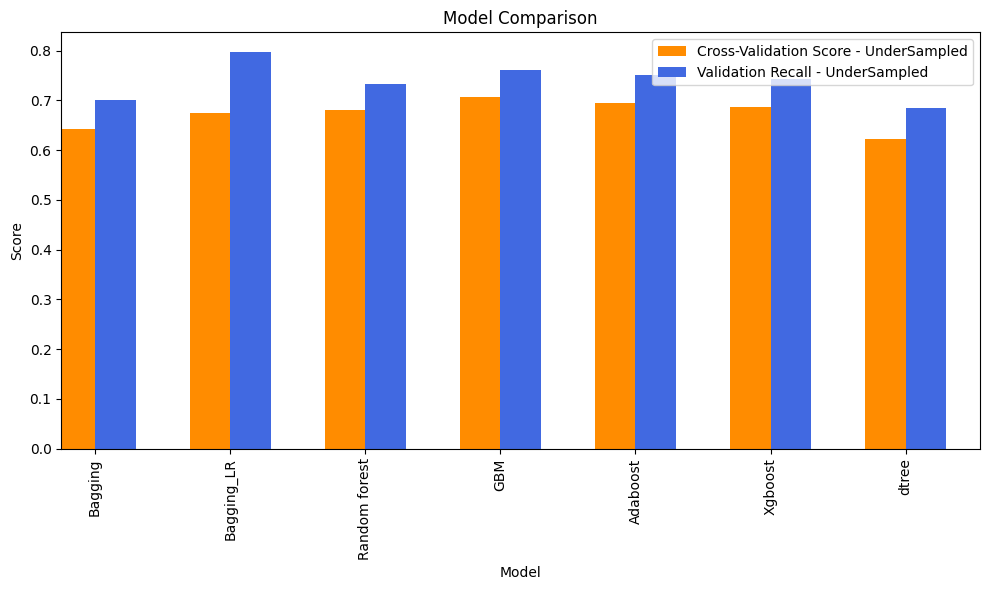

In [53]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))


# Bar plot for cross-validation results
cv_df_un['Mean_CV_Score'].plot(kind='bar', ax=ax, color='darkorange', position=1, width=0.3, label='Cross-Validation Score - UnderSampled')

# Bar plot for validation recall
cv_df_un['Validation_Recall'].plot(kind='bar', ax=ax, color='royalblue', position=0, width=0.3, label='Validation Recall - UnderSampled')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.legend()
plt.tight_layout()
plt.show()

* The score are close between the train and validation sets.
* Positive sign signaling that the models are generalizing well.
* Comparing various model, Logistic Regression seems to be performing better than other models.
* The models performance has dropped on undersampled data other then the logistic regression model.

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [54]:
%%time

model = AdaBoostClassifier(algorithm="SAMME",random_state=1)

param_grid = {
    "n_estimators": [5, 10, 15,20,25,50],
    "learning_rate": [0.1,0.3,0.5,0.7,0.9,1.0],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1), 
        DecisionTreeClassifier(max_depth=2, random_state=1), 
        DecisionTreeClassifier(max_depth=3, random_state=1)
    ]
}

randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

# Fitting
randomized_cv.fit(X_train_over, y_train_over)  # Use oversampled data

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'n_estimators': 15, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8069664635817336:
CPU times: user 760 ms, sys: 425 ms, total: 1.19 s
Wall time: 14 s


In [55]:
# Use the identified hyper parameters and create the model
tuned_ada = AdaBoostClassifier(
    n_estimators= 15, learning_rate= 0.5,algorithm="SAMME",  estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Fit the model with over sampled traning data
tuned_ada.fit(X_train_over, y_train_over)

# Add model to models list
add_model('Tuned ADA',tuned_ada,models)

In [56]:
# Get the scores for traning dataset
model_performance_classification_sklearn(tuned_ada,'Tuned ADA','Over Sampled Train', X_train_over, y_train_over)


,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Tuned ADA,Over Sampled Train,0.758671,0.839167,0.776044,0.806372


In [57]:
# Get the scores for validation dataset
result = model_performance_classification_sklearn(tuned_ada,'Tuned ADA','Validation - Over Sampled',X_val,y_val)
df_scores = pd.concat([df_scores,result], ignore_index=True)
df_scores

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047
7,Over Sampled Bagging,Validation,0.687018,0.757292,0.770201,0.763692
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
9,Over Sampled Random forest,Validation,0.713621,0.814976,0.769737,0.791711


In [58]:
# Fit the model with original data
tuned_ada_original = AdaBoostClassifier(
    n_estimators= 15, learning_rate= 0.5,algorithm="SAMME",  estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Fit the model with over sampled traning data
tuned_ada_original.fit(X_train, y_train)

# Get the scores for validation dataset
result = model_performance_classification_sklearn(tuned_ada_original,'Tuned ADA','Validation - Original',X_val,y_val)
df_scores = pd.concat([df_scores,result], ignore_index=True)
df_scores

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047
7,Over Sampled Bagging,Validation,0.687018,0.757292,0.770201,0.763692
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
9,Over Sampled Random forest,Validation,0.713621,0.814976,0.769737,0.791711


### Tuning Random forest using undersampled data

In [59]:
%%time

model = RandomForestClassifier(random_state=1)

param_grid = {
    "n_estimators": [5, 10, 15,20,25,50], 
    "min_samples_leaf": np.arange(1,10), 
    "max_features": ['sqrt', 'log2', 0.3, 0.5, 0.7, None], 
    "max_samples": np.arange(0.5,1.0,0.1)
} 

randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

# Fitting
randomized_cv.fit(X_train_un, y_train_un)  # Use undersampled data

add_model('Tuned RF',randomized_cv,models)
print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'n_estimators': 50, 'min_samples_leaf': 8, 'max_samples': 0.5, 'max_features': 0.5} with CV score=0.7075342286528682:
CPU times: user 741 ms, sys: 152 ms, total: 894 ms
Wall time: 11.3 s


In [60]:
# Use the identified hyper parameters and create the model

tuned_rf2 = RandomForestClassifier(
    max_features=0.5,
    random_state=1,
    max_samples=0.5,
    n_estimators=50,
    min_samples_leaf=8,
)

# fit the model with undersampled data
tuned_rf2.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features=0.5, max_samples=0.5, min_samples_leaf=8,
                       n_estimators=50, random_state=1)

In [61]:
# Get scores of traning dataset
model_performance_classification_sklearn(tuned_rf2, 'Tuned RF','Train', X_train_un, y_train_un)

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Tuned RF,Train,0.77351,0.775114,0.772635,0.773873


In [62]:
# Get the scores for validation dataset
results = model_performance_classification_sklearn(tuned_rf2,'Tuned RF','Validation - Under Sampled',X_val,y_val)
df_scores = pd.concat([df_scores,results], ignore_index=True)
df_scores

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047
7,Over Sampled Bagging,Validation,0.687018,0.757292,0.770201,0.763692
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
9,Over Sampled Random forest,Validation,0.713621,0.814976,0.769737,0.791711


In [63]:
# Fit the model with original data
tuned_rf2_original = RandomForestClassifier(
    max_features=0.5,
    random_state=1,
    max_samples=0.5,
    n_estimators=50,
    min_samples_leaf=8,
)

# fit the model with undersampled data
tuned_rf2_original.fit(X_train, y_train)

# Get the scores for validation dataset
result = model_performance_classification_sklearn(tuned_rf2_original,'Tuned RF','Validation - Original',X_val,y_val)
df_scores = pd.concat([df_scores,result], ignore_index=True)
df_scores

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047
7,Over Sampled Bagging,Validation,0.687018,0.757292,0.770201,0.763692
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
9,Over Sampled Random forest,Validation,0.713621,0.814976,0.769737,0.791711


### Tuning with Gradient boosting with oversampled data

In [64]:
%%time


model = GradientBoostingClassifier(random_state=1)

param_grid={
    "n_estimators": np.arange(10,500,5), 
    "learning_rate": np.arange(0.1,1.0,0.1), 
    "subsample":np.arange(0.1,1.0,0.1), 
    "max_features":['sqrt', 'log2', 0.3, 0.5, 0.7, None]
}

randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

# Fitting
randomized_cv.fit(X_train_un, y_train_un)  # Use undersampled data

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.6, 'n_estimators': 450, 'max_features': 0.3, 'learning_rate': 0.1} with CV score=0.7064424643515397:
CPU times: user 1.98 s, sys: 232 ms, total: 2.21 s
Wall time: 50.3 s


In [65]:
tuned_gbm = GradientBoostingClassifier(
    max_features=0.3,
    random_state=1,
    learning_rate=0.1,
    n_estimators=180,
    subsample= 0.6
)

tuned_gbm.fit(X_train_over, y_train_over)
add_model('Tuned GBM',tuned_gbm,models)

In [66]:
# Get scores of traning dataset
model_performance_classification_sklearn(tuned_gbm, 'Tuned GBM','Train oversampled', X_train_over, y_train_over)

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Tuned GBM,Train oversampled,0.769679,0.85243,0.782418,0.815925


In [67]:
# Get the scores for validation dataset
results = model_performance_classification_sklearn(tuned_gbm,'Tuned GBM','Validation - Over Sampled',X_val,y_val)
df_scores = pd.concat([df_scores,results], ignore_index=True)
df_scores

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047
7,Over Sampled Bagging,Validation,0.687018,0.757292,0.770201,0.763692
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
9,Over Sampled Random forest,Validation,0.713621,0.814976,0.769737,0.791711


In [68]:
tuned_gbm_original = GradientBoostingClassifier(
    max_features=0.3,
    random_state=1,
    learning_rate=0.1,
    n_estimators=180,
    subsample= 0.6
)

tuned_gbm_original.fit(X_train, y_train)

# Get the scores for validation dataset
results = model_performance_classification_sklearn(tuned_gbm_original,'Tuned GBM','Validation - Original',X_val,y_val)
df_scores = pd.concat([df_scores,results], ignore_index=True)
df_scores

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047
7,Over Sampled Bagging,Validation,0.687018,0.757292,0.770201,0.763692
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
9,Over Sampled Random forest,Validation,0.713621,0.814976,0.769737,0.791711


### Tuning XGBoost using oversampled data

In [69]:
%%time

model = XGBClassifier(random_state=1,eval_metric='logloss')

ratio = sum(y_train == 0) / sum(y_train == 1)

## Complete the code to define the hyperparameters
param_grid={
    'n_estimators':np.arange(10,500,5),
    'scale_pos_weight':[ratio * 0.8, ratio, ratio * 1.2], 
    'learning_rate': np.arange(0.01,0.5,0.05),
    'gamma':np.arange(0.1,1.0,0.1), 
    'subsample':np.arange(0.06,1.0,0.1)
}


randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
    random_state=1
)

# Fitting
randomized_cv.fit(X_train_over, y_train_over)  # Use undersampled data

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.36000000000000004, 'scale_pos_weight': 0.5966255351296902, 'n_estimators': 100, 'learning_rate': 0.060000000000000005, 'gamma': 0.6} with CV score=0.7836803632560505:
CPU times: user 1.17 s, sys: 585 ms, total: 1.76 s
Wall time: 17.5 s


In [70]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    subsample=0.36000000000000004,
    scale_pos_weight=0.5966255351296902,
    n_estimators=100,
    learning_rate=0.060000000000000005,
    gamma=0.6,
)

xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.6, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.060000000000000005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [71]:
# Get scores of traning dataset
model_performance_classification_sklearn(xgb2, 'Tuned XGB','Train oversampled', X_train_over, y_train_over)

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Tuned XGB,Train oversampled,0.774505,0.776966,0.835002,0.80494


In [72]:
# Get the scores for validation dataset
results = model_performance_classification_sklearn(xgb2,'Tuned XGB','Validation - Over Sampled',X_val,y_val)
df_scores = pd.concat([df_scores,results], ignore_index=True)
df_scores

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047
7,Over Sampled Bagging,Validation,0.687018,0.757292,0.770201,0.763692
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
9,Over Sampled Random forest,Validation,0.713621,0.814976,0.769737,0.791711


In [73]:
xgb2_original = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    subsample=0.36000000000000004,
    scale_pos_weight=0.5966255351296902,
    n_estimators=100,
    learning_rate=0.060000000000000005,
    gamma=0.6,
)

xgb2_original.fit(X_train, y_train)

# Get the scores for validation dataset
results = model_performance_classification_sklearn(xgb2_original,'Tuned XGB','Validation - Original',X_val,y_val)
df_scores = pd.concat([df_scores,results], ignore_index=True)
df_scores

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Bagging,Validation,0.691234,0.774488,0.765820,0.770130
1,Bagging_LR,Validation,0.666085,0.992599,0.668328,0.798809
2,Random forest,Validation,0.715656,0.832608,0.763168,0.796377
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
6,dtree,Validation,0.649368,0.732042,0.740097,0.736047
7,Over Sampled Bagging,Validation,0.687018,0.757292,0.770201,0.763692
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
9,Over Sampled Random forest,Validation,0.713621,0.814976,0.769737,0.791711


**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [74]:
df_scores.sort_values(by='F1',ascending=False)

,Model Name,Dataset,Accuracy,Recall,Precision,F1
3,GBM,Validation,0.736880,0.872878,0.765852,0.815870
26,Tuned GBM,Validation - Original,0.733101,0.868306,0.764176,0.812920
24,Tuned RF,Validation - Original,0.733537,0.864824,0.766249,0.812558
4,Adaboost,Validation,0.726268,0.882020,0.751344,0.811455
8,Over Sampled Bagging_LR,Validation,0.728304,0.871789,0.757805,0.810811
22,Tuned ADA,Validation - Original,0.727577,0.872007,0.756992,0.810439
5,Xgboost,Validation,0.723797,0.847845,0.764325,0.803922
21,Tuned ADA,Validation - Over Sampled,0.727722,0.835002,0.774793,0.803772
25,Tuned GBM,Validation - Over Sampled,0.725105,0.839573,0.769707,0.803123
10,Over Sampled GBM,Validation,0.727577,0.831519,0.776423,0.803027


In [75]:
# Get the scores for test dataset
df_test_scores = pd.DataFrame()
for name, model in models:
    results = model_performance_classification_sklearn(model,name,'Test',X_test,y_test)
    df_test_scores = pd.concat([df_test_scores,results], ignore_index=True)
df_test_scores.sort_values(by='F1',ascending=False)

,Model Name,Dataset,Accuracy,Recall,Precision,F1
3,GBM,Test,0.754248,0.890411,0.775128,0.828780
4,Adaboost,Test,0.747712,0.898239,0.765000,0.826283
23,Tuned GBM,Test,0.751634,0.870841,0.782074,0.824074
10,Over Sampled GBM,Test,0.752941,0.859100,0.789568,0.822868
21,Tuned ADA,Test,0.745098,0.855186,0.783154,0.817587
8,Over Sampled Bagging_LR,Test,0.734641,0.880626,0.760135,0.815956
11,Over Sampled Adaboost,Test,0.737255,0.857143,0.773852,0.813370
12,Over Sampled Xgboost,Test,0.739869,0.845401,0.782609,0.812794
5,Xgboost,Test,0.732026,0.868885,0.762887,0.812443
2,Random forest,Test,0.722876,0.853229,0.760908,0.804428


#### Observation
* Comparing the F1 scores of Validation datasets and Test datasets, the `GBM` model appears to be best performing model
* The `GBM` model apperas to have better F1 and Recall score
* Based on the observation we will select the `Gradient Boosting Model` model.

#### Feature importance

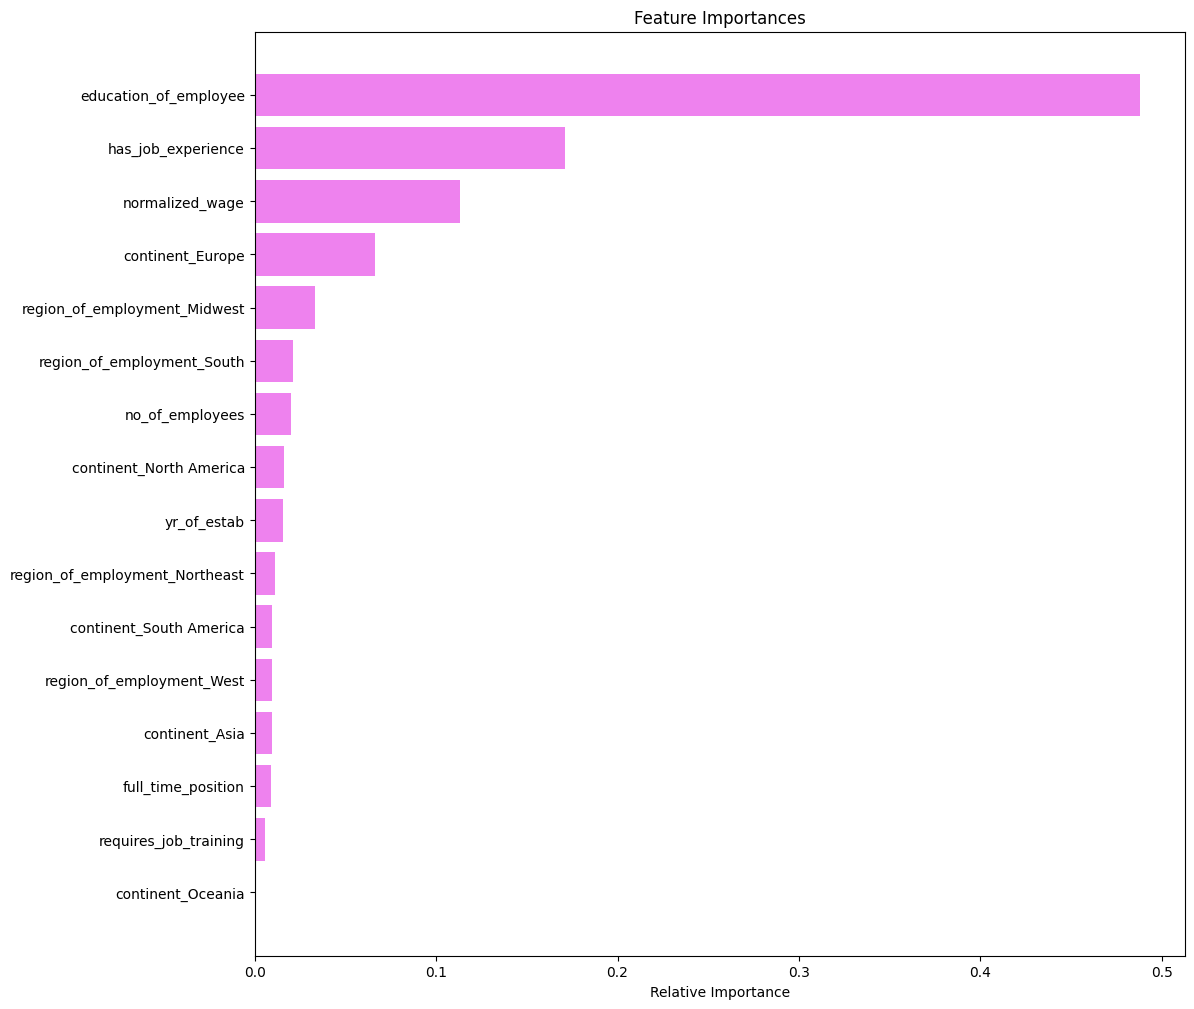

In [76]:
gbm_model,index = get_model_by_name('GBM',models)
feature_names = X_train.columns
importances = gbm_model.feature_importances_ 
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Analyzing the feature importances, the following features are important to make the decisions.
  * Education of the employee
  * Has Job Experience
  * Normalized wages
* These features are inline with the observations in EDA.

## Actionable Insights and Recommendations

1. Fine-Tune Decision Threshold for Business Needs
   * If reducing false denials is a priority, shift towards higher recall.
   * If avoiding unqualified approvals is key, prioritize higher precision.
   * F1-score is a balanced approach, but tweaking the threshold can help optimize for business impact.
   * Next Step: Try Precision-Recall Curve analysis to find the best decision threshold.
2. Improve Model Explainability
   * Use SHAP (SHapley Additive Explanations) to analyze which features contribute most to visa approvals.
   * Provide insights for stakeholders (e.g., why a case was denied).
   * Next Step: Run SHAP analysis on Gradient Boosting to generate insights.
3. Deploy & Monitor Model Performance
   * Set up a system to track model drift (e.g., visa policy changes affecting approval patterns).
   * Periodically retrain the model with updated data.

<font size=6 color='blue'>Power Ahead</font>
___